# EDA

In this notebook, we try to understand the structure, variables and properties of the data set used in the development of the model that will predict customer churn of banks.

We will check :
*    Feature types(categorical and numerical)
*    Missing values
*    Statistical informations for numerical features(mean, median, std, min, max)
*    Number of outliers
*    Correlation comparison
*    Distribution of target value

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

import warnings 
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath(os.path.join('..')))
from src.visual import plot_correlation_heatmap, plot_boxplot, plot_churn_by_categories

### Load Dataset

In [2]:
df = pd.read_csv('../data/raw/main_data.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Main Informations About Dataset

Under this heading, we collect the basic information of the dataset

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Key Insights:** 
*    We have 10k values with 14 features
     *    11 of the 14 features are numerical(int64 and float64)
     *    3 of the 14 features are string(object)
*    We don't have any null values in this dataset

### Target Value Analysis

Under this heading, we check the unbalanced distribution of the target variable.

In [8]:
target_counts = df['Exited'].value_counts()
target_counts

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='count'>

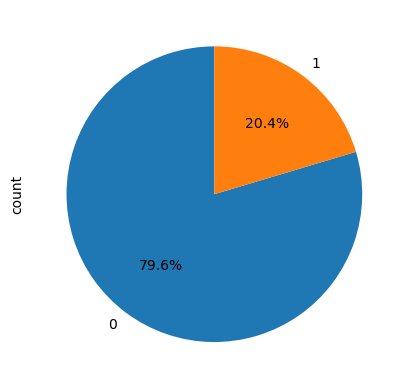

In [9]:
target_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

**Key Insights:** 
*    Dataset is unbalanced data with ~80% non-churn and ~20% churn data.
*    Without any model training, if we give non-churn(0) prediction, there will be nearby 80% accuracy rate.
*    To prevent this unbalanced distribution, solution methods such as:
     *    Giving more weight to the minority class with class weighting,
     *    Optimizing the classification threshold will be used.

### Categorical Variables and Churn Distribution

Under this heading, we visualize the churn-target distribution by categorical variables

In [10]:
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=15
                        and col not in "Exited"]
categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

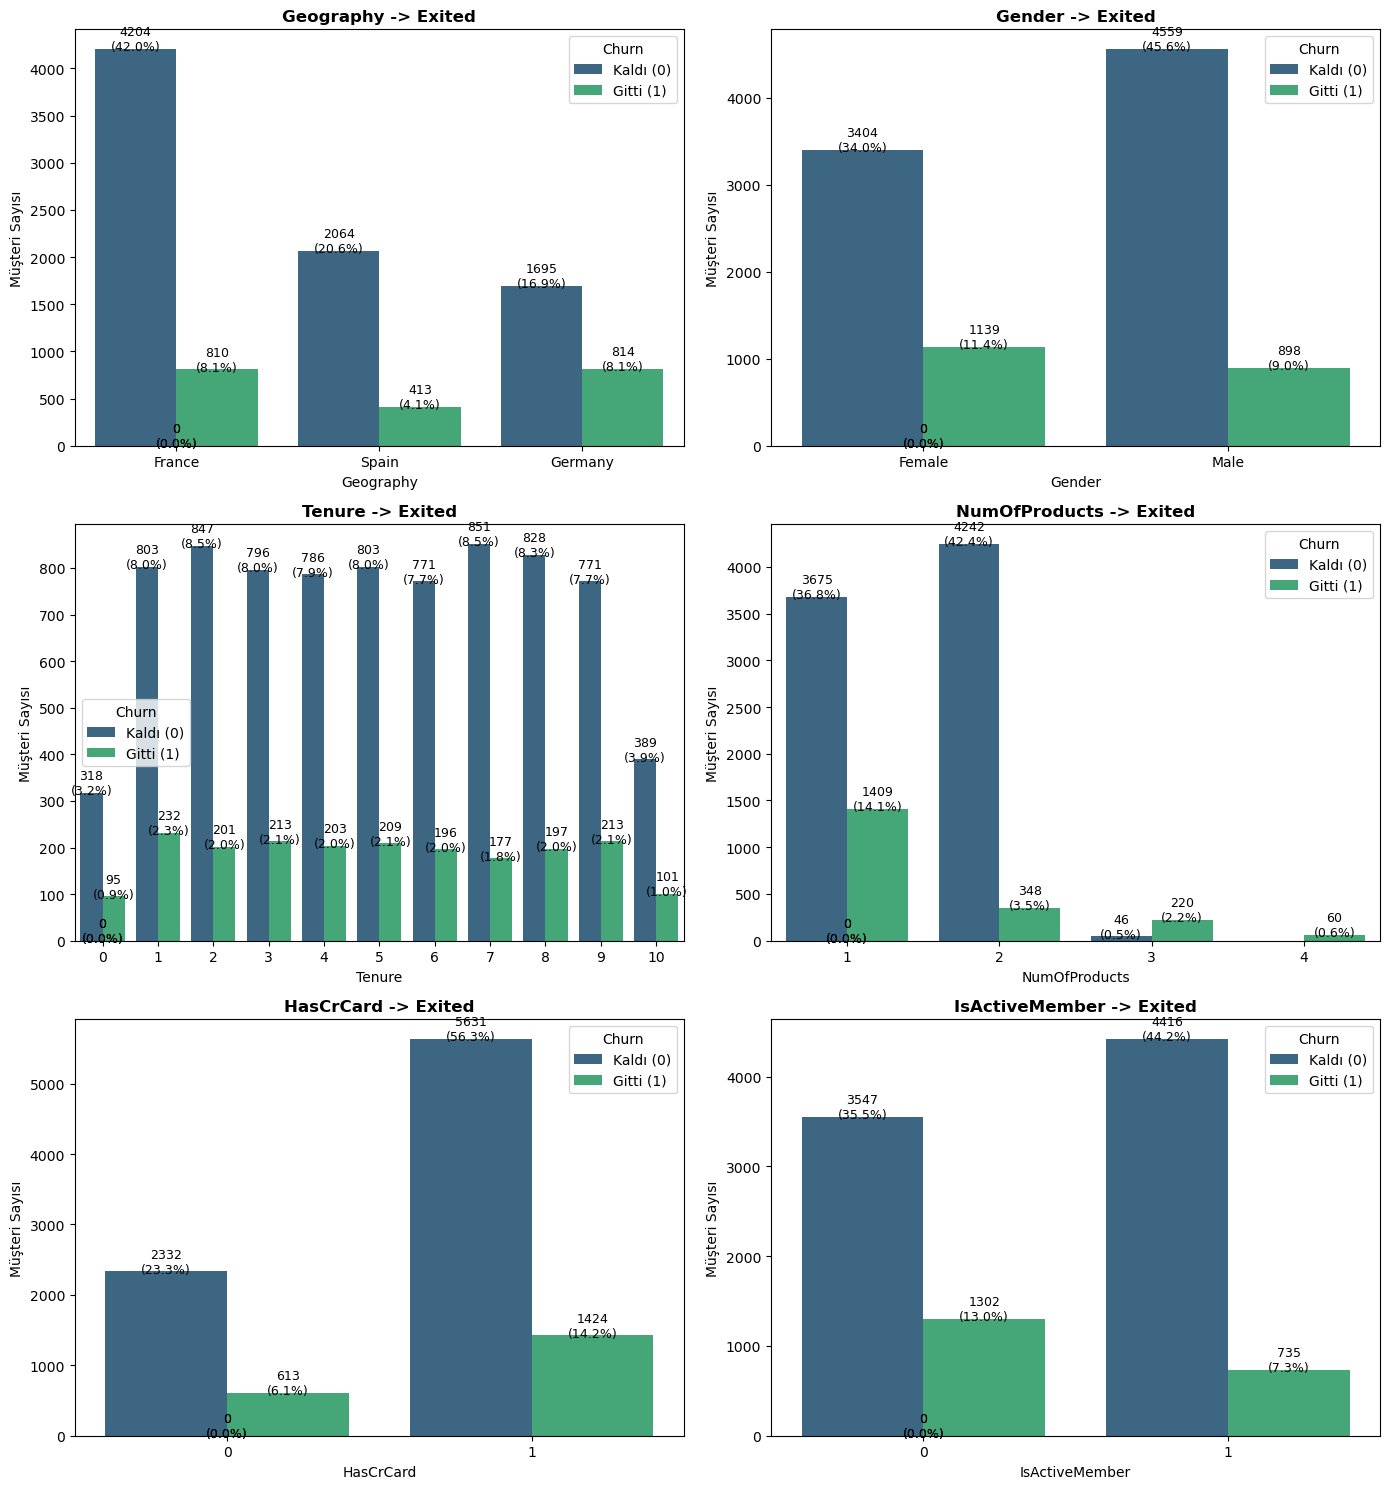

In [11]:
plot_churn_by_categories(df, categorical_variables)

**Key Insights:**
*    *NumOfProducts* column has 4 different values. 1,2,3 and 4 products.
     *    The customers with only one product have high churn rate. 
     *    The customers with 2 products have low churn rate.
     *    Almost all customers with 3 and 4 products are churn. 
*    *Geography* column has 3 different values. Germany, France and Spain.
     *    France and Spain have similar churn rate like 1/5. 
     *    Germany has high and critical churn rate like 1/2.
*    *Gender* 
     *    Churn rate for females(1/3) is higher than for males(1/5).
*    *IsActiveMember* 
     *    Churn rate for inactive members(1/2,7) is higher than for active members(1/6)
*    *HasCrCard*
     *    Churn rate is generally same(1/4) for customers with and without a credit card.
*    *Tenure*
     *    Churn rate is generally same for all tenure values.

### Outliers Control

In [12]:
numerical_values = ['Age', 'Balance', 'EstimatedSalary']

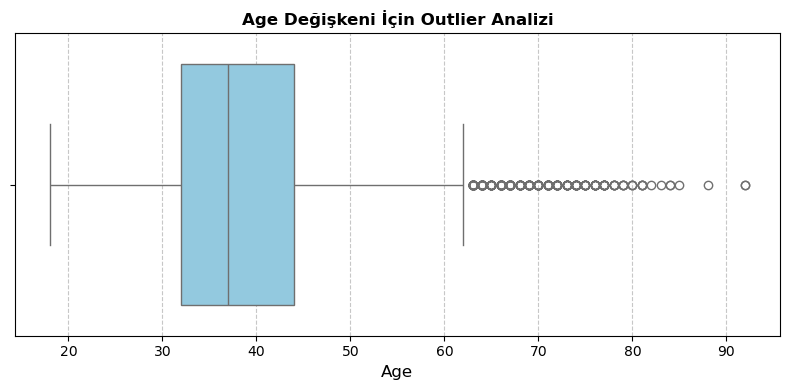

In [13]:
plot_boxplot(df, 'Age')

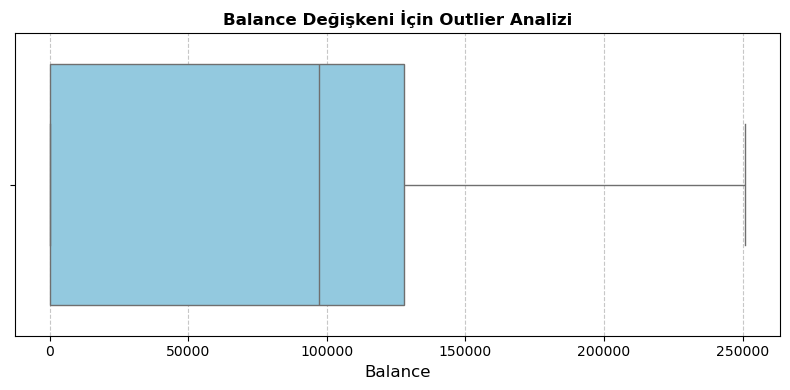

In [14]:
plot_boxplot(df, 'Balance')

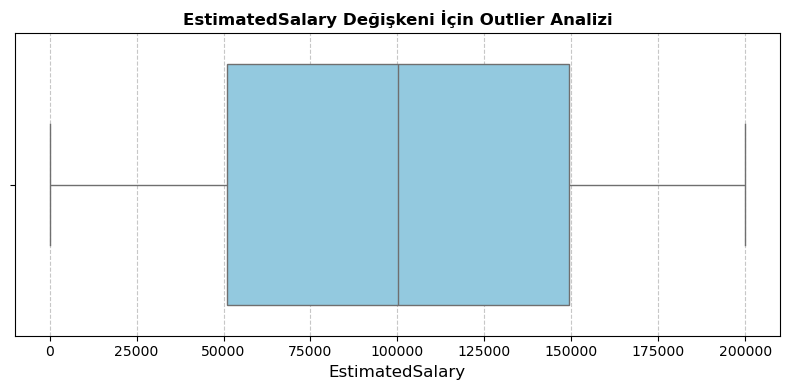

In [15]:
plot_boxplot(df, 'EstimatedSalary')

**Key Insights:** 

### Correlation Control

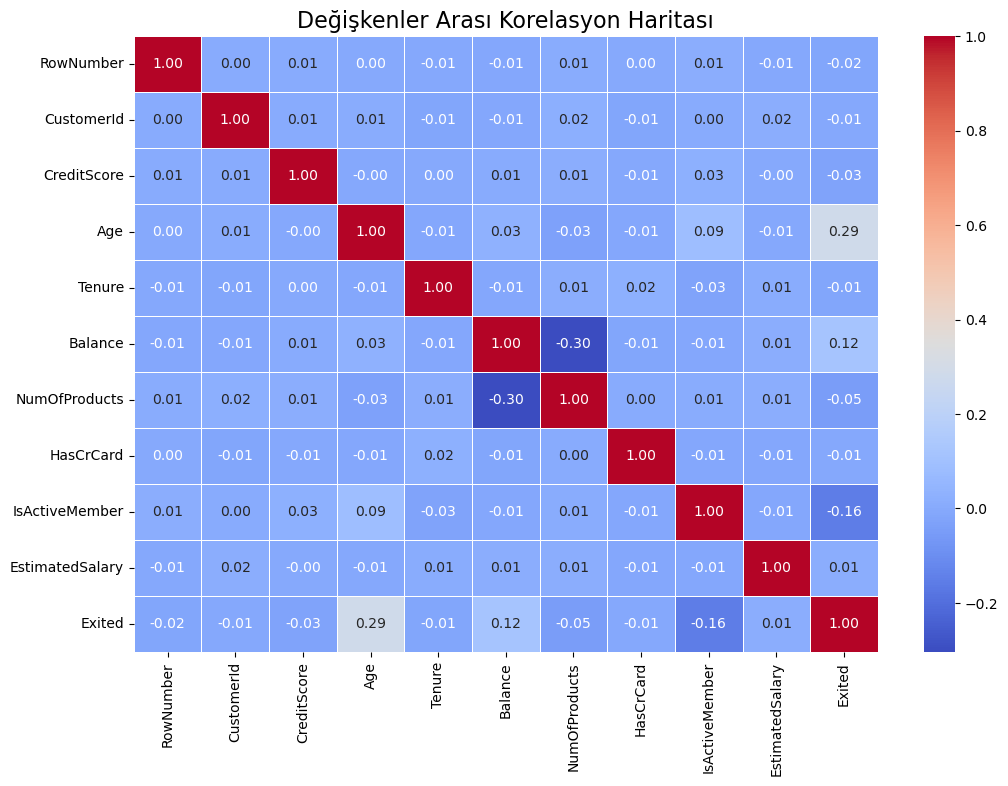

In [16]:
plot_correlation_heatmap(df, figsize=(12, 8))

**Key Insights:** 